<a href="https://colab.research.google.com/github/WiiWake3101/Bharat-Intern/blob/main/Bharat_Intern_Task_1_(House_Price_Predicition).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bharat Intern - Task 1

**Importing the Required Libraries**

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error
import tensorflow as tf
from google.colab import files

**Loading and Processing Data**

In [7]:
data=pd.read_csv('/content/Housing.csv')

In [8]:
print("Column names:")
print(data.columns)

Column names:
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-10-70172e0da303>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

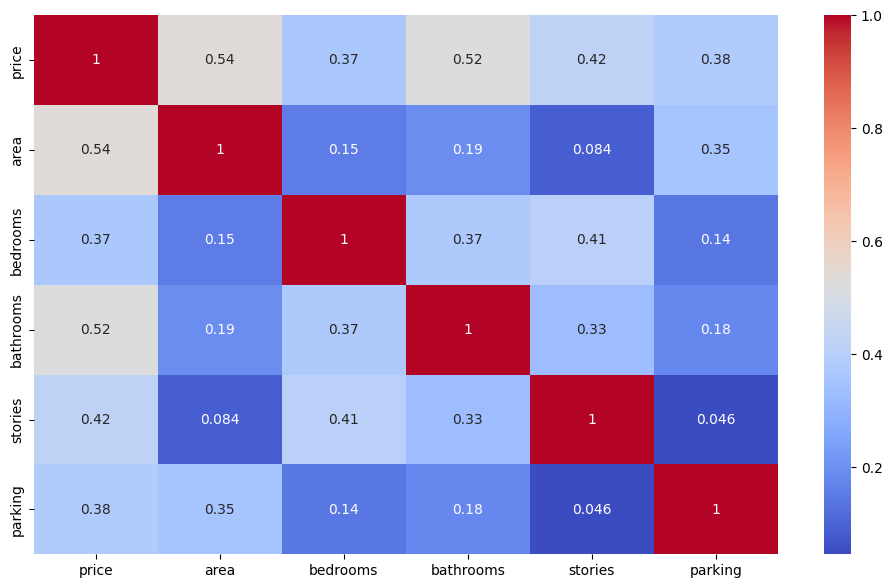

In [10]:
# CORRELATION BETWEEN THE COLUMNS
corr = data.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr,cmap='coolwarm',annot=True)

**Spliting The Dataset**

In [11]:
X = data.drop('price', axis=1)
y = data['price']

In [12]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [13]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
len(X_train),len(X_test)

(381, 164)

**Linear Regression**

In [16]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_predict = model_lr.predict(X_test)

train_score = model_lr.score(X_train, y_train)
test_score = model_lr.score(X_test, y_test)

y_predict

array([5372312.6161464 , 7069241.00525806, 3099290.78784024,
       4526446.61703975, 3281573.61192656, 3589455.18752547,
       5728625.30074515, 6422877.52476236, 2797870.49568591,
       2554357.99210552, 9693560.19894656, 2802903.76131031,
       3026465.95300837, 3433891.33202093, 3792786.34565513,
       5321204.36478555, 2999852.37322994, 4813306.52790376,
       4572077.61633938, 3595733.80237382, 5605701.03333099,
       5838934.41614981, 2730716.89440109, 4837741.37096247,
       5638460.49223856, 7809681.30410654, 3347443.37529207,
       5328750.6625753 , 8323072.83237386, 3374792.28854335,
       6379706.15324899, 3397999.89564252, 6709115.8233402 ,
       4249666.18392566, 3594972.20315591, 5842994.13027721,
       5115480.11172668, 4359421.90319848, 3046570.15372424,
       4597379.56416965, 4784358.17589609, 3411743.7822068 ,
       7048978.02507302, 4062741.36892573, 3785699.2416086 ,
       4286017.77250844, 6729020.2073964 , 4133428.23821411,
       3845434.09183082,

In [18]:
print(f"Training Score (R^2): {train_score}")
print(f"Test Score (R^2): {test_score}")

Training Score (R^2): 0.6931989807027313
Test Score (R^2): 0.6463350878895879


In [19]:
model_nn = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_nn.compile(optimizer='adam', loss='mean_squared_error')

model_nn.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

train_loss = model_nn.evaluate(X_train, y_train, verbose=0)
test_loss = model_nn.evaluate(X_test, y_test, verbose=0)

print(f"Training Loss: {train_loss}")
print(f"Test Loss: {test_loss}")

Training Loss: 25749817917440.0
Test Loss: 27049162964992.0


In [20]:
score = r2_score(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)

In [21]:
score,mae

(0.6463350878895879, 920392.9397607954)